<a href="https://colab.research.google.com/github/trinhvu1711/ML_Semester2_2023/blob/main/Lab_7_20130471_TrinhLongVu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [2]:
# code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score
#Import svm model
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
# GaussianNB
from sklearn.naive_bayes import GaussianNB
from prettytable import PrettyTable
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from scipy.stats import mode


#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [3]:
#code
data4 = datasets.load_iris()
print(data4)
X = data4['data']
y = data4['target']
clf =  svm.SVC(kernel='sigmoid' ,random_state =0)
scored = cross_validate(clf, X, y, scoring ='accuracy', cv =10)
print(sorted(scored.keys()))
print(np.mean(scored['test_score']))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.6, random_state = 0)
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
pkac = round(accuracy_score(y_test, y_pred), 2)
pkpc = round(precision_score(y_test, y_pred,average='macro'), 2)
pkrc= round(recall_score(y_test, y_pred,average='macro'), 2)
pkf= round(f1_score(y_test, y_pred,average='macro'), 2)
print ("Accuracy : ", pkac) 
print ("Precision : ", pkpc) 
print ("Recall score : ", pkrc) 
print ("F1 score : ", pkf)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
petal width (cm)     0.488713
petal length (cm)    0.416317
sepal length (cm)    0.078053
sepal width (cm)     0.016917
dtype: float64


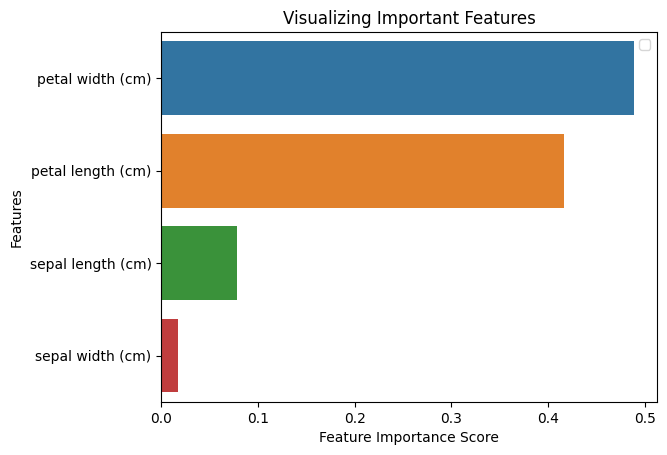

['petal width (cm)' 'petal length (cm)' 'sepal length (cm)']
     petal width (cm)  petal length (cm)  sepal length (cm)
0                 0.2                1.4                5.1
1                 0.2                1.4                4.9
2                 0.2                1.3                4.7
3                 0.2                1.5                4.6
4                 0.2                1.4                5.0
..                ...                ...                ...
145               2.3                5.2                6.7
146               1.9                5.0                6.3
147               2.0                5.2                6.5
148               2.3                5.4                6.2
149               1.8                5.1                5.9

[150 rows x 3 columns]


In [4]:
#code
#Create a Random Forest Classifier
clf=RandomForestClassifier(n_estimators=100)
feature_names  = data4['feature_names']

print(feature_names)
# print(X)
# print(y)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X,y)
feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
print(feature_imp)
# draw chart
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()
print
features = feature_imp.index[0:3].values
print(feature_imp.index[0:3].values)
data = pd.DataFrame(X)
data.columns = feature_names
# print(data)
# features_index = data.feature_names.index(feature_imp.index[0:3].values)
X_new = data[feature_imp.index[0:3]]
print(X_new)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=1)

In [5]:
# code
#Create a Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
rfcsfac = round(accuracy_score(y_test, y_pred), 4)
rfcsfpc = round(precision_score(y_test, y_pred,average='macro'), 4)
rfcsfrc= round(recall_score(y_test, y_pred,average='macro'), 4)
rfcsff= round(f1_score(y_test, y_pred,average='macro'), 4)
print ("Accuracy : ", rfcsfac) 
print ("Precision : ", rfcsfpc) 
print ("Recall score : ", rfcsfrc) 
print ("F1 score : ", rfcsff)

Accuracy :  0.9556
Precision :  0.9558
Recall score :  0.9558
F1 score :  0.9558


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [6]:
# code
data4 = datasets.load_digits()
cols = data4['feature_names']
X = data4['data']
y = data4['target']
kmeans = KMeans(n_clusters = 10, random_state = 0)
kmeans.fit(data4.data)
clusters = kmeans.predict(data4.data)
kmeans.cluster_centers_.shape
labels = np.zeros_like(clusters.data)
for i in range(10):
 mask = (clusters == i)
#  print(mask)
 labels[mask] = mode(data4.target[mask])[0]
#  print(labels[mask])
print(labels)
print(accuracy_score(data4.target, labels))


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 8 8 ... 8 9 9]
0.7935447968836951


<ipython-input-6-0c3c1210285c>:14: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(data4.target[mask])[0]


*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [7]:
data4 = datasets.load_digits()
# print(data4)
X = data4['data']
y = data4['target']
rfc=RandomForestClassifier(n_estimators=100)
scored = cross_validate(rfc, X, y, scoring ='accuracy', cv =10)
# print(sorted(scored.keys()))
print('accurary ',np.mean(scored['test_score']))
scored = cross_validate(rfc, X, y, scoring ='precision_macro', cv =10)
# print(sorted(scored.keys()))
print('precision ',np.mean(scored['test_score']))
scored = cross_validate(rfc, X, y, scoring ='recall_macro', cv =10)
# print(sorted(scored.keys()))
print('recall ',np.mean(scored['test_score']))
scored = cross_validate(rfc, X, y, scoring ='f1_macro', cv =10)
# print(sorted(scored.keys()))
print('f1 ',np.mean(scored['test_score']))

accurary  0.9443544382371197
precision  0.9541449769700543
recall  0.9499810801513586
f1  0.948999621214236


In [8]:
data4 = datasets.load_digits()
# print(data4)
X = data4['data']
y = data4['target']
clf_knn = KNeighborsClassifier()
scored = cross_validate(clf_knn, X, y, scoring ='accuracy', cv =10)
print(sorted(scored.keys()))
print('accurary ',np.mean(scored['test_score']))
scored = cross_validate(rfc, X, y, scoring ='precision_macro', cv =10)
# print(sorted(scored.keys()))
print('precision ',np.mean(scored['test_score']))
scored = cross_validate(rfc, X, y, scoring ='recall_macro', cv =10)
# print(sorted(scored.keys()))
print('recall ',np.mean(scored['test_score']))
scored = cross_validate(rfc, X, y, scoring ='f1_macro', cv =10)
# print(sorted(scored.keys()))
print('f1 ',np.mean(scored['test_score']))

['fit_time', 'score_time', 'test_score']
accurary  0.9716294227188081
precision  0.952894173462379
recall  0.9466185070519437
f1  0.9442285659132656


In [9]:
data4 = datasets.load_digits()
# print(data4)
X = data4['data']
y = data4['target']
model = GaussianNB()
scored = cross_validate(model, X, y, scoring ='accuracy', cv =10)
print(sorted(scored.keys()))
print('accurary ',np.mean(scored['test_score']))
scored = cross_validate(rfc, X, y, scoring ='precision_macro', cv =10)
# print(sorted(scored.keys()))
print('precision ',np.mean(scored['test_score']))
scored = cross_validate(rfc, X, y, scoring ='recall_macro', cv =10)
# print(sorted(scored.keys()))
print('recall ',np.mean(scored['test_score']))
scored = cross_validate(rfc, X, y, scoring ='f1_macro', cv =10)
# print(sorted(scored.keys()))
print('f1 ',np.mean(scored['test_score']))

['fit_time', 'score_time', 'test_score']
accurary  0.8113904407200497
precision  0.9537434199675079
recall  0.9477949776401788
f1  0.9468285393953592


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [ ]:
#code
# Supervised learning is better

2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

In [10]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
# get clustering labels
# clusters.labels

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 0, 0, ..., 0, 0, 0])

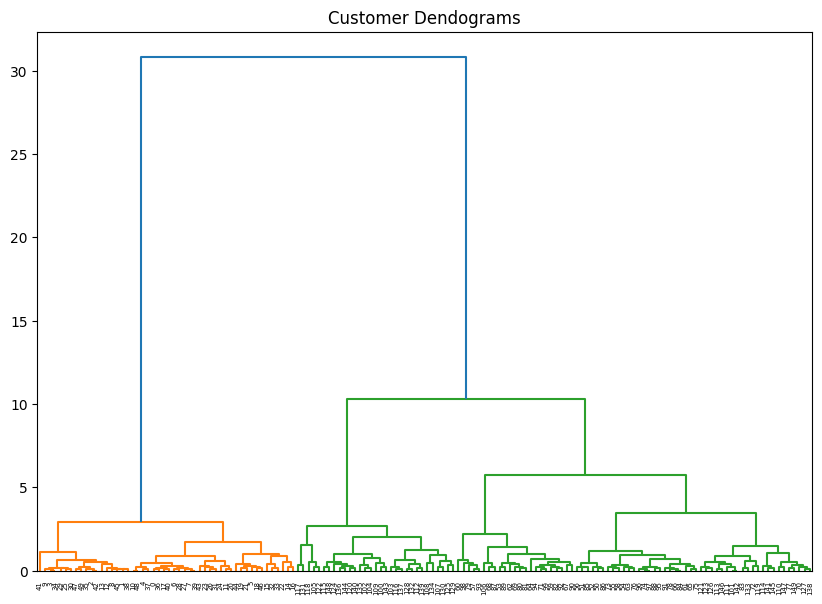

In [11]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
iris = load_iris()
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(iris.data[:, 1:4], method='ward'))

For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





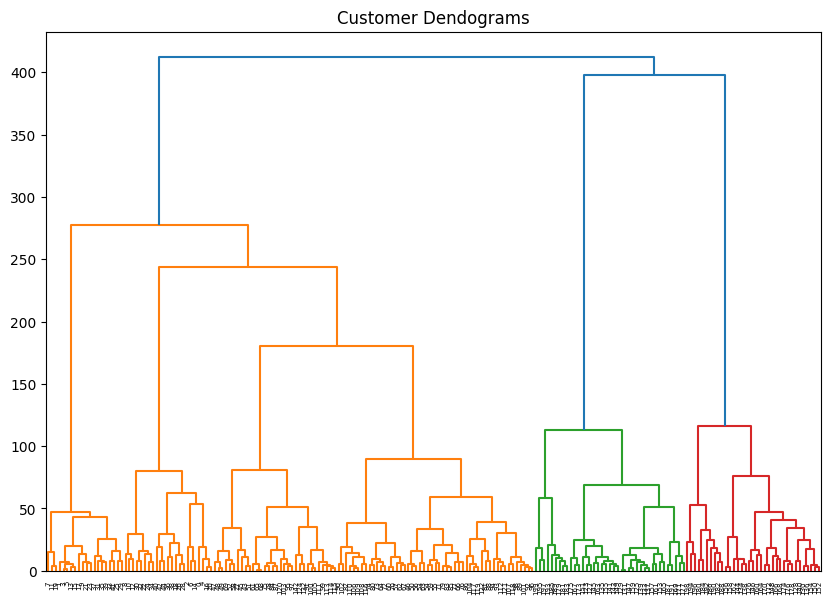

In [14]:
#code
data = pd.read_csv('shopping-data.csv')
data = data.drop(['CustomerID', 'Genre'], axis = 1)
data
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

In [17]:
#code
sse = []
for k in range(2, 11):
 kmeans = KMeans(n_clusters=k, random_state = 0,init='k-means++', n_init=10)
 kmeans.fit(data)
 sse.append(kmeans.inertia_)
sse

[212840.1698209719,
 143342.751571706,
 104366.15145556197,
 75350.77917248776,
 58300.44332159069,
 51084.505954934364,
 44344.94980177718,
 40953.73845841784,
 37602.692961061926]

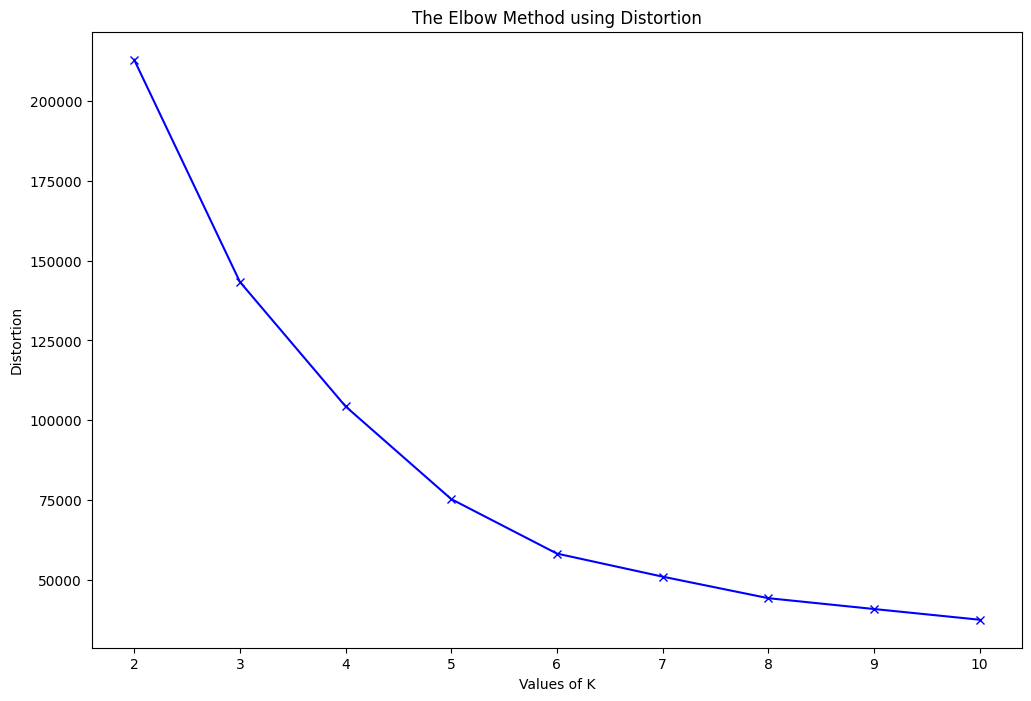

In [23]:
plt.figure(figsize=(12, 8))
plt.plot(np.arange(2, 11), sse, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [39]:
#code
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
print(cluster.labels_)
from sklearn.metrics import silhouette_score


[3 2 2 ... 2 4 2]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


#Finally,
Save a copy in your Github. Remember renaming the notebook.